In [1]:
!pip install dash

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 21.3 MB/s eta 0:00:00


In [2]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_similarity
import networkx as nx
import plotly.graph_objects as go
from dash import Dash, dcc, html
from dash.dependencies import Output, Input
import io
from base64 import b64encode

## Load and Understand Data

In [3]:
#load dataset
df = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-01-21/spotify_songs.csv')

In [4]:
df.head()

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32833 entries, 0 to 32832
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   track_id                  32833 non-null  object 
 1   track_name                32828 non-null  object 
 2   track_artist              32828 non-null  object 
 3   track_popularity          32833 non-null  int64  
 4   track_album_id            32833 non-null  object 
 5   track_album_name          32828 non-null  object 
 6   track_album_release_date  32833 non-null  object 
 7   playlist_name             32833 non-null  object 
 8   playlist_id               32833 non-null  object 
 9   playlist_genre            32833 non-null  object 
 10  playlist_subgenre         32833 non-null  object 
 11  danceability              32833 non-null  float64
 12  energy                    32833 non-null  float64
 13  key                       32833 non-null  int64  
 14  loudne

### Data Dictionary
**add a link and paste the definition of each fields here**

In [6]:
df.describe()

,track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
count,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000
mean,42.477081,0.654850,0.698619,5.374471,-6.719499,0.565711,0.107068,0.175334,0.084747,0.190176,0.510561,120.881132,225799.811622
std,24.984074,0.145085,0.180910,3.611657,2.988436,0.495671,0.101314,0.219633,0.224230,0.154317,0.233146,26.903624,59834.006182
min,0.000000,0.000000,0.000175,0.000000,-46.448000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4000.000000
25%,24.000000,0.563000,0.581000,2.000000,-8.171000,0.000000,0.041000,0.015100,0.000000,0.092700,0.331000,99.960000,187819.000000
50%,45.000000,0.672000,0.721000,6.000000,-6.166000,1.000000,0.062500,0.080400,0.000016,0.127000,0.512000,121.984000,216000.000000
75%,62.000000,0.761000,0.840000,9.000000,-4.645000,1.000000,0.132000,0.255000,0.004830,0.248000,0.693000,133.918000,253585.000000
max,100.000000,0.983000,1.000000,11.000000,1.275000,1.000000,0.918000,0.994000,0.994000,0.996000,0.991000,239.440000,517810.000000


After exploring the data I observed thatthe dataframe has:
1. 9 object type columns: 'track_id', 'track_name', 'track_artist','track_album_id', 'track_album_name', 'playlist_name', 'playlist_id', 'playlist_genre', 'playlist_subgenre'.
2. 1 datetime Type columns:'track_album_release_date',
3. 13 numerical columns: 'track_popularity','danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness','acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo','duration_ms'

I will transform object type columns into 'category' data type. Also, I will transform the 'track_album_release_date' column into 'datetime' data type.

In [7]:
# Convert object into a category
df[ 'track_id'] = df[ 'track_id'].astype('category')
df['track_name'] = df['track_name'].astype('category')
df['track_artist'] = df['track_artist'].astype('category')
df['track_album_id'] = df['track_album_id'].astype('category')
df['track_album_name'] = df['track_album_name'].astype('category')
df['playlist_name'] = df['playlist_name'].astype('category')
df['playlist_id'] = df['playlist_id'].astype('category')
df['playlist_genre'] = df['playlist_genre'].astype('category')
df['playlist_subgenre'] = df['playlist_subgenre'].astype('category')
timefmt = "%Y-%m-%d %H:%M:%S"
df['track_album_release_date'] = pd.to_datetime(df['track_album_release_date'], format = timefmt, errors='coerce')

In [8]:
df.duplicated().sum()

0

In [9]:
df.isna().sum()

track_id                    0
track_name                  5
track_artist                5
track_popularity            0
track_album_id              0
track_album_name            5
track_album_release_date    0
playlist_name               0
playlist_id                 0
playlist_genre              0
playlist_subgenre           0
danceability                0
energy                      0
key                         0
loudness                    0
mode                        0
speechiness                 0
acousticness                0
instrumentalness            0
liveness                    0
valence                     0
tempo                       0
duration_ms                 0
dtype: int64

In [10]:
null_mask = df.isnull().any(axis=1)
null_rows = df[null_mask]
print(null_rows)

                     track_id track_name track_artist  track_popularity  \
8151   69gRFGOWY9OMpFJgFol1u0        NaN          NaN                 0   
9282   5cjecvX0CmC9gK0Laf5EMQ        NaN          NaN                 0   
9283   5TTzhRSWQS4Yu8xTgAuq6D        NaN          NaN                 0   
19568  3VKFip3OdAvv4OfNTgFWeQ        NaN          NaN                 0   
19811  69gRFGOWY9OMpFJgFol1u0        NaN          NaN                 0   

               track_album_id track_album_name track_album_release_date  \
8151   717UG2du6utFe7CdmpuUe3              NaN               2012-01-05   
9282   3luHJEPw434tvNbme3SP8M              NaN               2017-12-01   
9283   3luHJEPw434tvNbme3SP8M              NaN               2017-12-01   
19568  717UG2du6utFe7CdmpuUe3              NaN               2012-01-05   
19811  717UG2du6utFe7CdmpuUe3              NaN               2012-01-05   

            playlist_name             playlist_id playlist_genre  ... key  \
8151              HIP

In [11]:
#Drop the rows where at least one element is missing.
df=df.dropna()

#Visualizations & Discussions

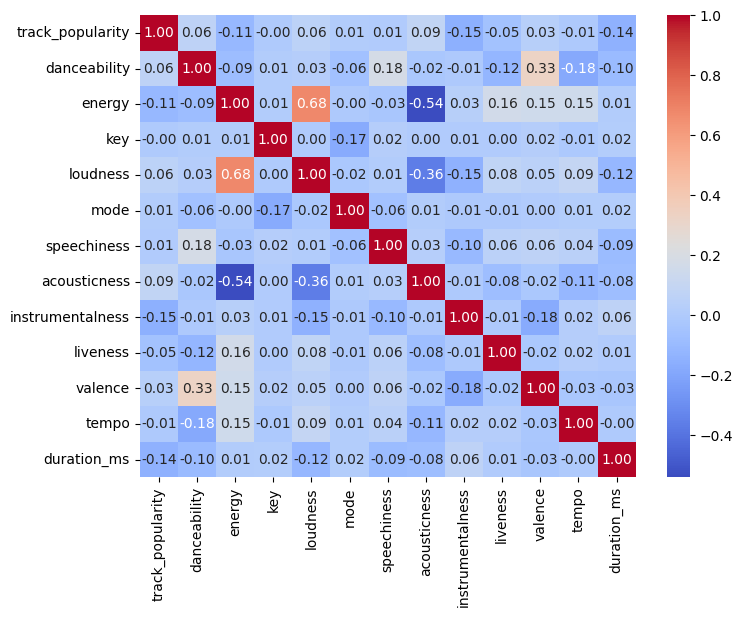

In [12]:
# Select only numeric columns
numeric_columns = df.select_dtypes(include=['float64', 'int64'])

# Create a correlation matrix
correlation_matrix = numeric_columns.corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

energy vs. loudness (0.676662): There is a moderate positive correlation between energy and loudness. This indicates that more energetic tracks tend to be louder.

acousticness vs. energy (-0.539732): There is a moderate negative correlation between acousticness and energy. This suggests that, on average, more acoustic tracks tend to have lower energy.

It's important to note that correlation does not imply causation, and these relationships are based on statistical associations in the data. Additionally, the strength of correlation can vary, and other factors not considered in this analysis may influence the relationships between these variables.

To further understand this relationship visually, we can plot more.

In [13]:
df.columns

Index(['track_id', 'track_name', 'track_artist', 'track_popularity',
       'track_album_id', 'track_album_name', 'track_album_release_date',
       'playlist_name', 'playlist_id', 'playlist_genre', 'playlist_subgenre',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms'],
      dtype='object')

In [ ]:
sns.pairplot(df[['energy', 'key', 'loudness', 'mode', 'danceability','speechiness','acousticness','instrumentalness','liveness', 'valence','tempo','duration_ms', 'playlist_genre']], hue='playlist_genre', palette='viridis')
plt.show()

### notes
- Please keep 'key' and 'mode' in above pairplot
- To remove 'key' and 'mode' is what we should do after analyzing the pairplot, so you'd not take them away before that
- Remove popularity from pairplot and the above matrix please. popularity is our target variable, which should be included in a pairplot for coorelation analysis

## Question 1: how the musical features contribute to the popularity of a track?
- we can add a linear regression model here, before we plot a parallel chart
- with a linear regression model, we try to find out what are more important features for a popular track
- to begin with, split into train_test_dataset; at last, get r-squared for the model accuracy scoring
- for the parallel chart below, we don't need to list all the features. let's get the more important features based on the conclusion from the linear model


In [ ]:
# Selecting features and target variable
features = ['energy', 'loudness', 'danceability', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']
target = 'track_popularity'

X = df[features]
y = df[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)


LinearRegression()

In [ ]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 581.1621073533039


In [ ]:
# Calculate R-squared
r_squared = r2_score(y_test, y_pred)
print(f'R-squared: {r_squared}')

R-squared: 0.05331783902821985


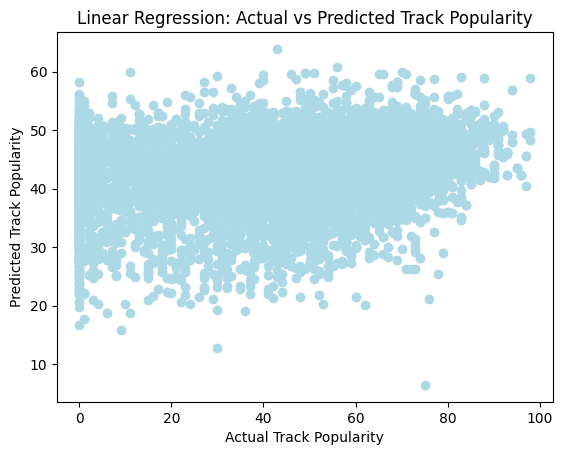

In [ ]:
# Plotting actual vs predicted values
plt.scatter(y_test, y_pred,color="lightblue")
plt.xlabel('Actual Track Popularity')
plt.ylabel('Predicted Track Popularity')
plt.title('Linear Regression: Actual vs Predicted Track Popularity')
plt.show()

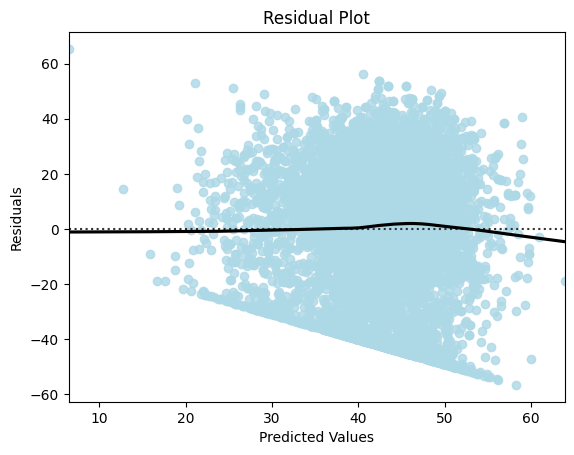

In [ ]:
y_true = y_test
# Calculate residuals
residuals = y_true - y_pred

# Create a residual plot
sns.residplot(x=y_pred, y=residuals, lowess=True, color="lightblue" ,line_kws={'color': 'black'})
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

In [ ]:
# create parallel coordinates plot using Plotly Express
fig = px.parallel_coordinates(pd.concat([df.select_dtypes(float), df.track_popularity], axis=1),
                              color="track_popularity",
                              color_continuous_scale=px.colors.sequential.Purpor,  # Change color scale to Viridis
                              color_continuous_midpoint=50)

# Show the plot
fig.show()

# Save the plot to an HTML file
fig.write_html("parallel_coordinates_plot.html")

#### Our findings
- the dark purple lines denote the most popular tracks
- track the mean of those dark purple line across each feature
-** @Mahbuba, say we can put popularity into 3 levels 0 - 40, 41 - 80, 81 - 100. is it possible to draw a mean line for each popularity group across all features?**

## Question 2: what's the popularity like across all the genres and sub_genres?
- to answer this question, we simply group by genres and sub_genres
- get the mean of popularity of tracks within each group
- we visual it in an interactive pie chart, tooltips pop up ono mouse moving over
- hued by popularity, so the most and least popular genre pop up at first sight

In [ ]:
# create  Sunburs plot using Plotly Express
df[['playlist_genre', 'playlist_subgenre']] = df[['playlist_genre', 'playlist_subgenre']] \
                                                  .apply(lambda x: x.str.capitalize(), axis=1)
fig = px.sunburst(df,
                  path=['playlist_genre', 'playlist_subgenre'],
                  color='track_popularity',
                  labels={'track_popularity': 'Popularity'})
fig.show()
fig.update_layout(
    width=800,  # set the width in pixels
    height=400  # set the height in pixels
)
# Save the plot to an HTML file
fig.write_html("Sunburst_plot.html")

#### Our findings
- Pop and Lating are generally the most popular genres, while Edm is least popular
- Post-teen pop is the most popular sub_genre, while New jack swing is least popular sub_genre
**- Does the findings make sense? Explain with what we observe in real life @Carlos**

## Question 3: how are the genres differed by attributes
We'd like to find out if there is any significant difference across the genres regarding various music features. Here are the steps we follow:
- group by genre, get the mean of features
- use random forest to find out the importance of features
- take the top 8 important features, plot a polar chart

In [ ]:
# Assuming 'df' is your original DataFrame
selected_columns = ['playlist_genre', 'danceability', 'energy', 'loudness',
                    'acousticness','liveness', 'valence', 'tempo', 'duration_ms']

# Create a new DataFrame with the selected columns
r_df = df[selected_columns]
r_df.head()

,playlist_genre,danceability,energy,loudness,acousticness,liveness,valence,tempo,duration_ms
0,Pop,0.748,0.916,-2.634,0.1020,0.0653,0.518,122.036,194754
1,Pop,0.726,0.815,-4.969,0.0724,0.3570,0.693,99.972,162600
2,Pop,0.675,0.931,-3.432,0.0794,0.1100,0.613,124.008,176616
3,Pop,0.718,0.930,-3.778,0.0287,0.2040,0.277,121.956,169093
4,Pop,0.650,0.833,-4.672,0.0803,0.0833,0.725,123.976,189052


In [ ]:
#Drop the rows where at least one element is missing.
r_df=r_df.dropna()

In [ ]:
# Group by 'playlist_genre' and calculate the mean for each group
mean_df = r_df.groupby('playlist_genre').mean().reset_index()

# Merge the mean values back into the original DataFrame
merge_df = pd.merge(r_df, mean_df, on='playlist_genre', suffixes=('', '_mean'))
merge_df.head(2)

,playlist_genre,danceability,energy,loudness,acousticness,liveness,valence,tempo,duration_ms,danceability_mean,energy_mean,loudness_mean,acousticness_mean,liveness_mean,valence_mean,tempo_mean,duration_ms_mean
0,Pop,0.748,0.916,-2.634,0.1020,0.0653,0.518,122.036,194754,0.639302,0.701028,-6.315328,0.170794,0.176833,0.503521,120.743178,217768.104231
1,Pop,0.726,0.815,-4.969,0.0724,0.3570,0.693,99.972,162600,0.639302,0.701028,-6.315328,0.170794,0.176833,0.503521,120.743178,217768.104231


In [ ]:
# Assuming 'df' is your DataFrame
numeric_columns = ['danceability', 'energy', 'loudness',
                    'acousticness','liveness', 'valence', 'tempo', 'duration_ms']

# Create a MinMaxScaler instance
scaler = MinMaxScaler()

# Normalize the selected numeric columns
merge_df[numeric_columns] = scaler.fit_transform(merge_df[numeric_columns])

In [ ]:
# Define columns to calculate mean
columns_to_mean = ['danceability', 'energy', 'loudness',
                    'acousticness','liveness', 'valence', 'tempo', 'duration_ms']

# Group by 'playlist_genre' and calculate mean for specified columns
grouped_df = merge_df.groupby('playlist_genre')[columns_to_mean].mean().reset_index()
grouped_df .head()

,playlist_genre,danceability,energy,loudness,acousticness,liveness,valence,tempo,duration_ms
0,Edm,0.666369,0.802441,0.859555,0.081996,0.212710,0.404294,0.525259,0.425334
1,Latin,0.725630,0.708199,0.842021,0.212256,0.181379,0.610977,0.495452,0.414246
2,Pop,0.650358,0.700976,0.840950,0.171825,0.177543,0.508094,0.504273,0.416045
3,R&b,0.681769,0.590863,0.808481,0.261473,0.175972,0.536055,0.477039,0.454642
4,Rap,0.730829,0.650587,0.825710,0.193708,0.192392,0.509707,0.503929,0.409014


In [ ]:
# Define the features (columns) for the radar chart
features = ['danceability', 'energy', 'loudness',
                    'acousticness', 'liveness', 'valence', 'tempo', 'duration_ms']

# Melt the DataFrame to long format
grouped_long_df = grouped_df.melt(id_vars='playlist_genre', value_vars=features,
                                   var_name='feature', value_name='normalized_value')


In [ ]:
# Define features and target variable
features = ['danceability', 'energy', 'loudness',
                    'acousticness','liveness', 'valence', 'tempo', 'duration_ms']
target = 'playlist_genre'

# Prepare data
X = df[features]
y = df[target]

In [ ]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Fit Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

Model Accuracy: 0.53


In [ ]:
# Get feature importances
feature_importances = pd.DataFrame({'Feature': features, 'Importance': rf_model.feature_importances_})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Display feature importances
print("Feature Importances:")
print(feature_importances)

Feature Importances:
        Feature  Importance
6         tempo    0.161996
0  danceability    0.145583
1        energy    0.122988
7   duration_ms    0.121520
5       valence    0.121154
3  acousticness    0.119459
2      loudness    0.113966
4      liveness    0.093334


In [ ]:
# Merge the two DataFrames based on the 'Feature' column
merged_df = pd.merge(grouped_long_df, feature_importances, left_on='feature', right_on='Feature', how='left')

# Drop the redundant 'Feature' column from the merged DataFrame
merged_df = merged_df.drop(columns=['Feature'])


In [ ]:
# Create a radar chart
fig = px.line_polar(merged_df, r='normalized_value', theta='feature',
                    line_close=True, color='playlist_genre',
                    line_shape="linear", template="plotly_dark",
                    title='Radar Chart of Normalized Mean Values by Playlist Genre')

# Update layout properties including the template color
fig.update_layout(
    polar=dict(
        bgcolor='lightgrey',  # Set background color of the radar chart
        radialaxis=dict(
            visible=True,  # Show radial axis lines
            gridcolor='white',  # Set color of radial gridlines
            tickfont=dict(color='black')  # Set color of radial axis tick labels
        ),
        angularaxis=dict(
            gridcolor='white',  # Set color of angular gridlines
            tickfont=dict(color='black')  # Set color of angular axis tick labels
        )
    ),
    template="plotly",  # Change the template color to "plotly"
)

# Show the radar chart
fig.show()
# Save the plot to an HTML file
fig.write_html("radar_charts_plot.html")

#### Our findings
- there are some features that show significant difference, such as danceability, energy, acousticsness and valence
- while the remaining features show very little difference for the purpose of genres differentiation

## Question 4: what artists are more similar in terms of musical feature?
We'd like to find out who and who are closer, as the feature genres alone is too general for clustering. We perform clustering based on simple logic:
- calcualte the cosine similarity of each artist pair, the similarity range from -1 to 1. -1 indicate strong negative correlation, while 1 strong positive correlation
- get similarity matrix from above, plot network graph with plotly
- in the network graphs, the closer distance denote higher similarity
**- the nodes are hued by popularity @Mahbuba, try if we can do this**

In [ ]:
# Assuming 'df' is your original DataFrame
selected_columns = ['track_id', 'track_name', 'track_artist', 'track_popularity',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms']

# Create a new DataFrame with the selected columns
n_df = df[selected_columns]
n_df.head()

In [ ]:
# Assuming your DataFrame is named 'df'
grouped_by_artist = n_df.groupby('track_artist').mean()

grouped_by_artist = grouped_by_artist.reset_index()


In [ ]:
# Sort the DataFrame by 'track_popularity' in descending order
sorted_df = grouped_by_artist.sort_values(by='track_popularity', ascending=False)

# Get the top 3000 rows (artists) from the sorted DataFrame
top_300_artists_df = sorted_df.head(300)

# Display the DataFrame with the top 300 artists
top_300_artists_df.head()

In [ ]:
# Assuming 'df' is your DataFrame
numeric_columns = ['track_popularity','danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo','duration_ms']

# Create a MinMaxScaler instance
scaler = MinMaxScaler()

# Normalize the selected numeric columns
top_300_artists_df[numeric_columns] = scaler.fit_transform(top_300_artists_df[numeric_columns])

In [ ]:
# Assuming your DataFrame is named 'df' and contains the necessary music attributes
features = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
            'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']

# Select relevant columns for similarity computation
X = top_300_artists_df[features]

# Compute cosine similarity matrix
similarity_matrix = cosine_similarity(X, X)

# Create a DataFrame from the similarity matrix
similarity_df = pd.DataFrame(similarity_matrix, index=top_300_artists_df['track_artist'], columns=top_300_artists_df['track_artist'])

# Display the similarity matrix DataFrame
similarity_df.head()

In [ ]:
# Add popularity attribute to nodes
popularity= top_300_artists_df.groupby('track_artist')['track_popularity'].mean().to_dict()

In [ ]:
# Group by 'track_artist' and calculate the mean popularity for each artist
artist_popularity = top_300_artists_df.groupby('track_artist')['track_popularity'].mean()

# Create a DataFrame from the aggregated popularity values
artist_popularity_df = pd.DataFrame(artist_popularity).reset_index()

# Rename the columns for clarity
artist_popularity_df.columns = ['track_artist', 'popularity']

# Sort the DataFrame by average popularity in descending order
artist_popularity_df = artist_popularity_df.sort_values(by='popularity', ascending=False)

# Display the artist popularity DataFrame
artist_popularity_df.head()
# Merge the two DataFrames on 'track_artist'
top_300_artists_df = pd.merge(top_300_artists_df, artist_popularity_df, on='track_artist', how='left')

In [ ]:
# Create a graph using networkx
G = nx.Graph()

# Add nodes and edges to the graph based on the top 5 maximum similarity values for each artist
for i in range(len(top_300_artists_df)):
    artist = top_300_artists_df.iloc[i]['track_artist']

    # Find the indices of top 5 similarity values for the current artist
    top_5_indices = similarity_matrix[i].argsort()[-4:-1][::-1]

    for j in top_5_indices:
        if j != i:  # Exclude self-connection
            target_artist = top_300_artists_df.iloc[j]['track_artist']
            similarity = similarity_matrix[i, j]
            G.add_node(artist, popularity=top_300_artists_df.iloc[i]['popularity'])
            G.add_node(target_artist, popularity=top_300_artists_df.iloc[j]['popularity'])
            G.add_edge(artist, target_artist, weight=similarity)

In [ ]:
# Extract node positions
pos = nx.spring_layout(G)

# Create nodes and edges
edge_x = []
edge_y = []
edge_text = []
edge_width = []

for edge in G.edges(data=True):
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    edge_x.extend([x0, x1, None])
    edge_y.extend([y0, y1, None])
    edge_text.append(f"Similarity: {edge[2]['weight']:.3f}")
    edge_width.append(edge[2]['weight'])

# Create edge trace
edge_trace = go.Scatter(
    x=edge_x,
    y=edge_y,
    line=dict(width=max(edge_width), color='gray'),  # Use max(edge_width) as a single numeric value
    hoverinfo='text',
    text=edge_text,
    mode='lines')

# Create nodes
node_x = []
node_y = []
node_text = []
node_color = []

for node in G.nodes():
    x, y = pos[node]
    node_x.append(x)
    node_y.append(y)
    node_text.append(node)
    node_color.append(G.nodes[node]['popularity'])

# Create node trace
node_trace = go.Scatter(
    x=node_x,
    y=node_y,
    text=node_text,
    mode='markers',
    hoverinfo='text',
    marker=dict(
        showscale=True,
        colorscale='Viridis',  # Change colorscale to Viridis
        size=10,
        colorbar=dict(
            thickness=15,
            title='Popularity',
            xanchor='left',
            titleside='right'
        ),
        color=node_color  # Use popularity as color attribute
    )
)

# Create figure
fig = go.Figure(data=[edge_trace, node_trace],
                layout=go.Layout(
                    showlegend=False,
                    hovermode='closest',
                    margin=dict(b=0, l=0, r=0, t=0),
                    xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                    yaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                    paper_bgcolor='white',  # Set background color to white
                    plot_bgcolor='white'   # Set plot area color to white
                )
            )

# Show the plot
fig.show()

In [ ]:
# Extract node positions
pos = nx.spring_layout(G)

# Create nodes and edges
edge_x = []
edge_y = []
edge_text = []
edge_width = []

for edge in G.edges(data=True):
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    edge_x.extend([x0, x1, None])
    edge_y.extend([y0, y1, None])
    edge_text.append(f"Similarity: {edge[2]['weight']:.3f}")
    edge_width.append(edge[2]['weight'])

edge_trace = go.Scatter(
    x=edge_x,
    y=edge_y,
    line=dict(width=max(edge_width), color='gray'),  # Use max(edge_width) as a single numeric value
    hoverinfo='text',
    text=edge_text,
    mode='lines')

# Create nodes
node_x = []
node_y = []
node_text = []

for node in G.nodes():
    x, y = pos[node]
    node_x.append(x)
    node_y.append(y)
    node_text.append(node)

node_trace = go.Scatter(
    x=node_x,
    y=node_y,
    text=node_text,
    mode='markers',
    hoverinfo='text',
    marker=dict(
        showscale=True,
        colorscale='Sunsetdark',  # Change colorscale to Reds
        size=10,
        colorbar=dict(
            thickness=15,
            title='Similarity',
            xanchor='left',
            titleside='right'
        ),
        color=edge_width  # Use edge width as color attribute
    )
)

# Create figure
fig = go.Figure(data=[edge_trace, node_trace],
                layout=go.Layout(
                    showlegend=False,
                    hovermode='closest',
                    margin=dict(b=0, l=0, r=0, t=0),
                    xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                    yaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                    paper_bgcolor='white',  # Set background color to white
                    plot_bgcolor='white'   # Set plot area color to white
                )
            )

# Show the plot
fig.show()
# Save the plot to an HTML file
fig.write_html("network_graph_plot.html")

#### Our findings
- as above, we show only 200 artists and the top 3 similar edges for each artist
- the tooltips is not good, could we show the popularity value of an artist below its name? @Mahbuba

## The challenges
- placeholder

## What's next
- placeholder

In [ ]:
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output

# Create Dash app
app = dash.Dash(__name__)

# Sample parallel_coordinate
fig_parallel_coordinates = px.parallel_coordinates(pd.concat([df.select_dtypes(float), df.track_popularity], axis=1),
                              color="track_popularity",
                              color_continuous_scale=px.colors.sequential.Purpor,  # Change color scale to Viridis
                              color_continuous_midpoint=50)
# Create networkgraph
fig_network_graph = go.Figure(data=[edge_trace, node_trace],
                layout=go.Layout(
                    showlegend=False,
                    hovermode='closest',
                    margin=dict(b=0, l=0, r=0, t=0),
                    xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                    yaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                    paper_bgcolor='white',  # Set background color to white
                    plot_bgcolor='white'   # Set plot area color to white
                )
            )
# create  Sunburs plot
df[['playlist_genre', 'playlist_subgenre']] = df[['playlist_genre', 'playlist_subgenre']] \
                                                  .apply(lambda x: x.str.capitalize(), axis=1)
fig_Sunburs_plot = px.sunburst(df,
                  path=['playlist_genre', 'playlist_subgenre'],
                  color='track_popularity',
                  labels={'track_popularity': 'Popularity'})

# Create a radar chart
fig_radar_chart = px.line_polar(merged_df, r='normalized_value', theta='feature',
                    line_close=True, color='playlist_genre',
                    line_shape="linear", template="plotly_dark",
                    title='Radar Chart of Normalized Mean Values by Playlist Genre')

# Update layout properties including the template color
fig_radar_chart.update_layout(
    polar=dict(
        bgcolor='lightgrey',  # Set background color of the radar chart
        radialaxis=dict(
            visible=True,  # Show radial axis lines
            gridcolor='white',  # Set color of radial gridlines
            tickfont=dict(color='black')  # Set color of radial axis tick labels
        ),
        angularaxis=dict(
            gridcolor='white',  # Set color of angular gridlines
            tickfont=dict(color='black')  # Set color of angular axis tick labels
        )
    ),
    template="plotly",  # Change the template color to "plotly"
)

# Define layout
app.layout = html.Div([
    html.H1("Multi-Figure Dashboard"),

    html.Div([
        dcc.Graph(figure=fig_parallel_coordinates),
        dcc.Graph(figure=fig_network_graph )
    ], style={'display': 'flex'}),

    html.Div([
        dcc.Graph(figure=fig_Sunburs_plot),
        dcc.Graph(figure=fig_radar_chart)
    ], style={'display': 'flex'})
])

if __name__ == '__main__':
    app.run_server(debug=True)
